In [69]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

# Parte 1 - leitura dos datasets e prepação dos dataframes para a análise dos dados

In [47]:
df_mat = pd.read_csv('student-mat.csv', sep = ';');
df_mat.head();

In [48]:
df_por = pd.read_csv('student-por.csv', sep = ';');
df_por.head();

In [49]:
df = pd.merge(df_mat, df_por, how = 'inner', on = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']);
df;

In [50]:
df.rename(columns={
    'guardian_x': 'guardian_mat',
    'traveltime_x': 'traveltime_mat',
    'studytime_x': 'studytime_mat',
    'failures_x': 'failures_mat',
    'shcoolsup_x': 'schoolsup_mat',
    'famsup_x': 'famsup_mat',
    'paid_x': 'paid_mat',
    'activities_x': 'activities_mat',
    'higher_x': 'higher_mat',
    'romantic_x': 'romantic_mat',
    'famrel_x': 'famrel_mat',
    'freetime_x': 'freetime_mat',
    'gooyt_x': 'goout_mat',
    'Dalc_x': 'Dalc_mat',
    'Walc_x': 'Walc_mat',
    'health_x': 'health_mat',
    'absences_x': 'absences_mat',
    'G1_x': 'G1_mat',
    'G2_x': 'G2_mat',
    'G3_x': 'G3_mat',
    'guardian_y': 'guardian_por',
    'traveltime_y': 'traveltime_por',
    'studytime_y': 'studytime_por',
    'failures_y': 'failures_por',
    'shcoolsup_y': 'schoolsup_por',
    'famsup_y': 'famsup_por',
    'paid_y': 'paid_por',
    'activities_y': 'activities_por',
    'higher_y': 'higher_por',
    'romantic_y': 'romantic_por',
    'famrel_y': 'famrel_por',
    'freetime_y': 'freetime_por',
    'gooyt_y': 'goout_por',
    'Dalc_y': 'Dalc_por',
    'Walc_y': 'Walc_por',
    'health_y': 'health_por',
    'absences_y': 'absences_por',
    'G1_y': 'G1_por',
    'G2_y': 'G2_por',
    'G3_y': 'G3_por'
}, inplace = True);
df.head();

## Definição da média final

In [51]:
df['GF'] = (df['G1_mat'] + df['G2_mat'] + df['G3_mat'] + df['G1_por'] + df['G2_por'] + df['G3_por'])/6;
df;

# Parte 2 - obtenção de informações gerais a respeito das médias finais

## Resumo dos dados

O método describe() da biblioteca Pandas nos permite ter um resumo estatísticos dos d1ados de uma forma rápida, facilitando a análise dos dados e economizando tempo. Abaixo aplicamos esse método ao dataframe em análise:

In [52]:
df.describe();

Podemos extrair diversos dados do resumo estatístico, dentre eles (arrendodados para duas casas decimais): <br><br>
- A média das  idades dos alunos é 16.59
- O aluno mais novo tem 15 anos
- O aluno mais velho tem 22 anos
- O tempo médio que os alunos gastam estudando Português é em tornod e 2 a 5 horas (porque a média é 2.039267 - entre 2 e 3)

Dados que são interessantes para análise e que podemos extrair do resumo dizem respeito às médias finais dos alunos. Observando esses dados (arrendondados para duas casas decimais), temos: <br><br>
- A média das médias é 11.47
- A mediana das médias (segundo quartil) é 11.33
- O terceiro quartil das médias é 13.33
- A menor média é 4
- A maior média é 18.33

O fato da mediana (segundo quartil) ser 11.3, indica que pelo menos 50% dos alunos obteve média acima de 11.3 e que 50% dos alunos obteve média acima de 11.3. <br><br>
O fato do terceiro quartil ser 13.33 indica que pelo menos 75% dos alunos obteve nota acima de 13.33, ao passo que pelo menos 25% dos alunos obteve nota acima de 13.33. <br><br>

## Identificação de <i>outliers</i>

O resumo estatístico retornado pelo método describe(), no entanto, não deixa explícito se exitem no conjunto das nas médias dos alunos valores que são discrepantes dos demais, isso é, se existem <i>outliers</i>. <br><br>
Identificar os valores discrepantes é importante para que possamos ter uma análise mais acurada dos dados, visto que eles causam efeitos indesejáveis e colaterais nas análises, sobretudo por conta da média ser sensível a esses valores. Desta forma, se identificarmos outliers, devemos tratá-los a fim de obter uma análise mais fidefigna de nossos dados.

Um método rápido e explícito de observar se existem outliers em nosso conjunto de dados é gerar o diagrama de caixa, o boxplot, para o conjunto de dados. Abaixo é gerado o boxplot para as médias finais dos alunos

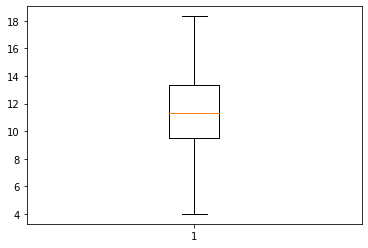

In [53]:
plt.boxplot(df['GF']);

O diagrama gerado mostra que não existem outliers nas médias finais dos alunos e corrobora com o resumo estatístico dos dados no que diz respeito ao primeiro quartil, à mediana, ao terceiro quartil, ao menor valor das médias finais e o maior valor das médias finais.

A fim de computar em variáveis os valores de cada uma dessas medidas para que possam ser usadas futuramente, podemos criar variáveis para cada uma delas:

### Média das médias finais



In [54]:
media_gf = np.mean(df['GF']);
media_gf

11.471204188481675

In [55]:
mediana_gf = np.median(df['GF']);
print(mediana_gf);

11.333333333333334


### Primeiro quartil das médias finais

In [56]:
q1_gf = df['GF'].quantile(0.25);
print(q1_gf);

9.5


### Terceiro quartil das médias finais

In [57]:
q3_gf = df['GF'].quantile(0.75);
print(q3_gf);

13.333333333333334


### Menor média final

In [58]:
menor_media_gf = np.min(df['GF']);
print(menor_media_gf);

4.0


### Maior média final

In [59]:
maior_media_gf = np.max(df['GF']);
print(maior_media_gf);

18.333333333333332


## Histograma das médias finais, assimetria e curtose

A fim de analisarmos a distribuição de frequências das médias finais e suas características, plotamos o histograma para essa variável:

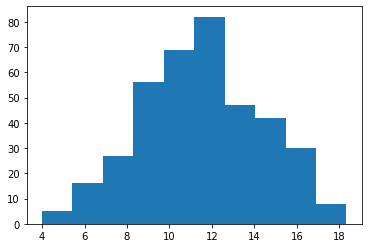

In [60]:
plt.hist(df['GF']);

A partir do histograma podemos ver que uma grande parte dos alunos (mais de 80) obtiveram médias finais entre 10 e 12. <br>
O histograma também sugere que a distribuição é levemente assimétrica à direita, pois mais médias finais **estão concentrados nos menores valores**.

## Cáculo do Coeficiente de Assimetria de Bowley

Para constatar ou refutar a assimetria que inferimos do histograma, podemos aplicar a fórmula do Coeficiente de Assimetria de Bowley às médias finais.

A Assimetria de Bowley é dada por: <br>
## <center>$ A_{b} = \frac{q1 + q3 - 2*md}{q3 - q1}  $</center>

Onde:
- q1 é o primeiro quartil
- q3 é o terceiro quartil
- md é a mediana

E:
- Se $ A_{b} = 0 $, a distribuição é simétrica
- Se $ A_{b} < 0 $, a distribuição é assimétrica negativa (com assimetria à esquerda)
- Se $ A_{b} > 0 $, a distribuição é assimétrica positiva (com assimetria à direita) 

In [61]:
assimetria_bowley = (q1_gf + q3_gf - 2*(mediana_gf))/(q3_gf - q1_gf)
print(assimetria_bowley)

0.04347826086956552


De fato, a distribuição apresenta uma assimetria à direita, pois o coeficiente de assimetria de Bowley resultou em 0.04347826086956552, um número positivo.

Também poderíamos inferir a assimetria pelos valores da média e da mediana das médias finais:

In [66]:
print(media_gf)

11.471204188481675


In [67]:
print(mediana_gf)

11.333333333333334


Como a média é maior que a mediana, naturalmente temos uma distribuição assimétrica à direita, com uma concentração nos menores valores.

Isso indica que a maioria dos alunos obteve uma nota baixo da média.